In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
categories = None  # Load all 20 categories
dataset = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X, y = dataset.data, dataset.target


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
classifier = MultinomialNB()
model = make_pipeline(vectorizer, classifier)
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7257294429708223
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.34      0.46       151
           1       0.69      0.70      0.70       202
           2       0.67      0.65      0.66       195
           3       0.55      0.77      0.64       183
           4       0.86      0.67      0.76       205
           5       0.88      0.81      0.84       215
           6       0.79      0.70      0.75       193
           7       0.84      0.77      0.81       196
           8       0.49      0.79      0.60       168
           9       0.93      0.83      0.88       211
          10       0.90      0.92      0.91       198
          11       0.73      0.84      0.78       201
          12       0.84      0.63      0.72       202
          13       0.91      0.88      0.90       194
          14       0.80      0.83      0.81       189
          15       0.45      0.93      0.61       202
          16       0.70     

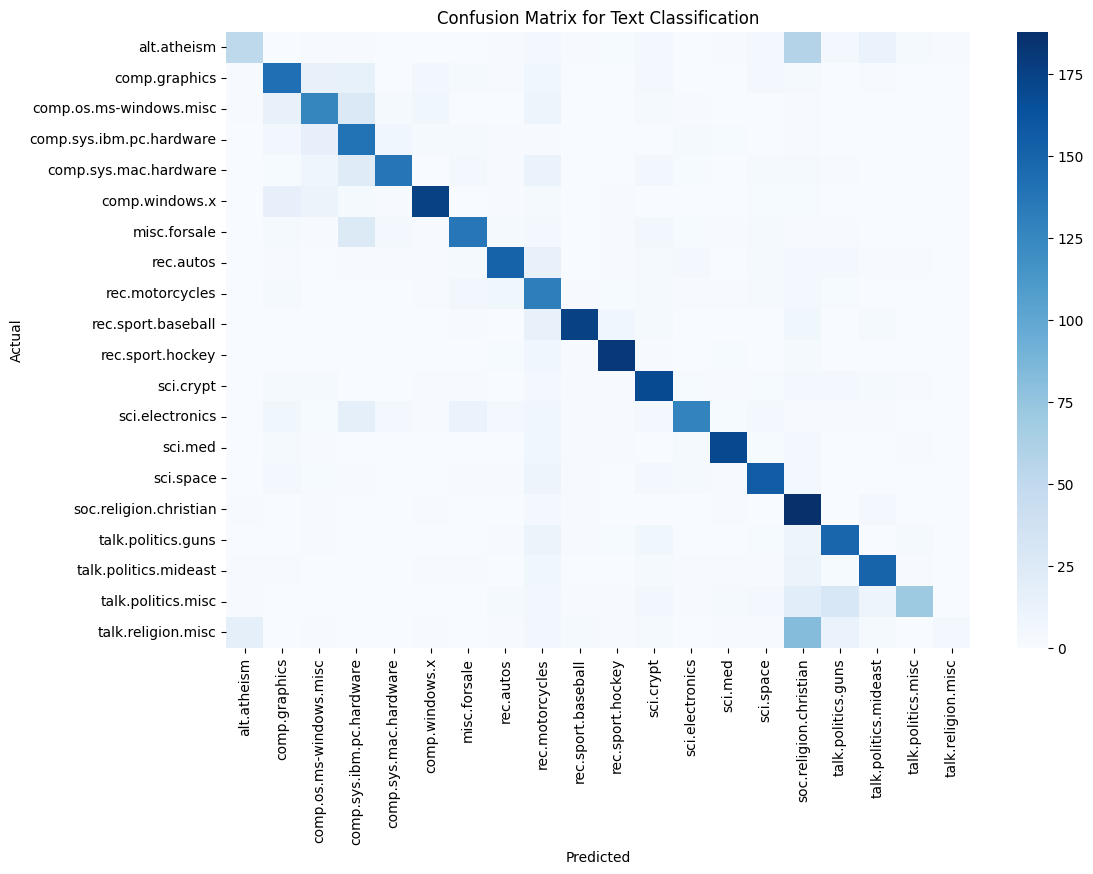

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Text Classification')
plt.show()
